In [13]:
import pandas as pd
import graphviz 
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

# Import données

In [14]:
merged_data = pd.read_csv('out.csv')
colonnes_inutiles = ['num_veh','Num_Acc',
                                'locp',
                                'actp',
                                'etatp',
                                'catv',
                                'hrmn',
                                'mois',
                                'jour',
                                'catvopp',
                                'occutc',
                                'place']

merged_data = merged_data.drop(colonnes_inutiles,axis = 1)


y = merged_data.grav
merged_data_sans_grav = merged_data.drop(['grav'],axis = 1)

# Encoding

In [15]:
encoded = pd.get_dummies(merged_data_sans_grav['catu'], prefix='catu')

for colname in merged_data_sans_grav.columns:
    if not colname in ['an_nais', 'catu']:
        dummy = pd.get_dummies(merged_data_sans_grav[colname], prefix=colname)
        encoded = pd.merge(encoded, dummy, left_index=True, right_index=True)

encoded = pd.merge(encoded, pd.DataFrame(merged_data_sans_grav['an_nais']), left_index=True, right_index=True)

# Classification

In [16]:
profondeur = 4
clf = tree.DecisionTreeClassifier(max_depth=profondeur)
clf = clf.fit(encoded, y)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=encoded.columns,  
                         class_names='grav',  
                         filled=True, rounded=True,  
                         special_characters=True)  

# Vizualistaion

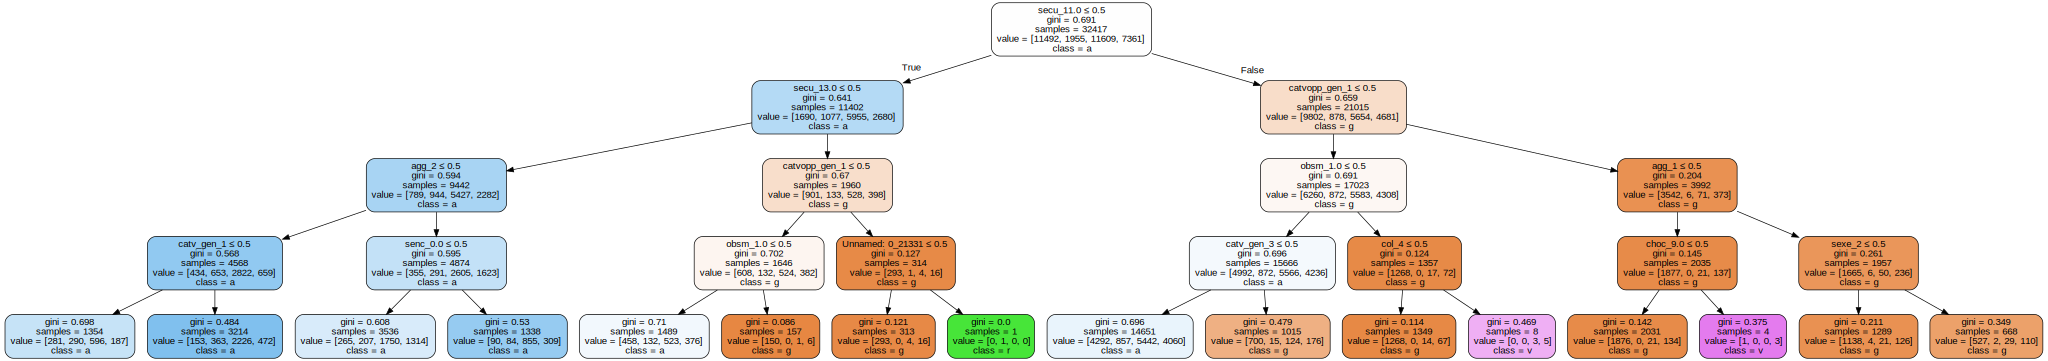

In [17]:
graph = graphviz.Source(dot_data) 

graph